# 1、导入 networkx 包

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 2、创建无向图

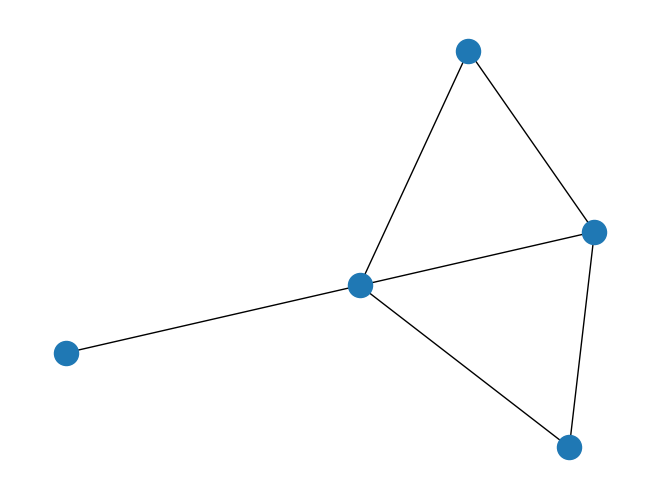

In [41]:
g = nx.Graph()
# 添加图的节点
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(5)
# 添加图的边
g.add_edge(1, 2)
g.add_edge(2, 3) 
g.add_edge(3, 4) # 当添加的边对应的节点不存在的时候，会自动创建相应的节点
g.add_edge(3, 5)
g.add_edge(5, 1)
g.add_edge(1, 3)
# 绘制图
nx.draw(g)

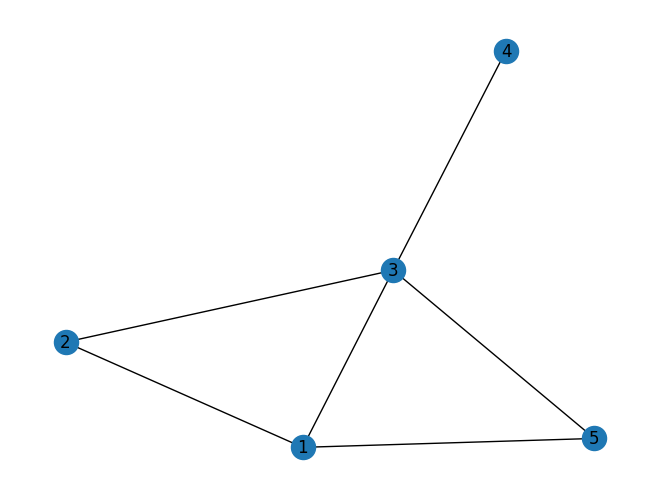

In [42]:
# 绘制的图带label
nx.draw(g, with_labels=True)

# 3、创建有向图

In [9]:
# 判断图是否为有向图
dg = nx.DiGraph()
print(g.is_directed())
print(dg.is_directed())

False
True


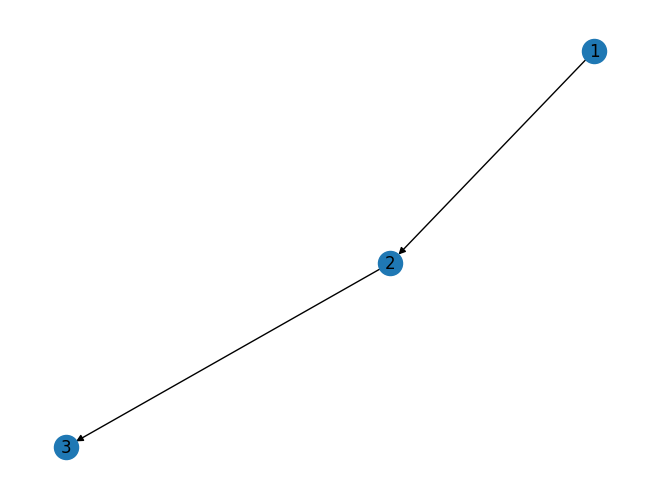

In [11]:
# 添加图的节点
dg.add_node(1)
dg.add_node(2)
# 添加图的边
dg.add_edge(1, 2)
dg.add_edge(2, 3) # 当添加的边对应的节点不存在的时候，会自动创建相应的节点
# 绘制有向图
nx.draw(dg, with_labels=True)

# 4、空手道俱乐部图

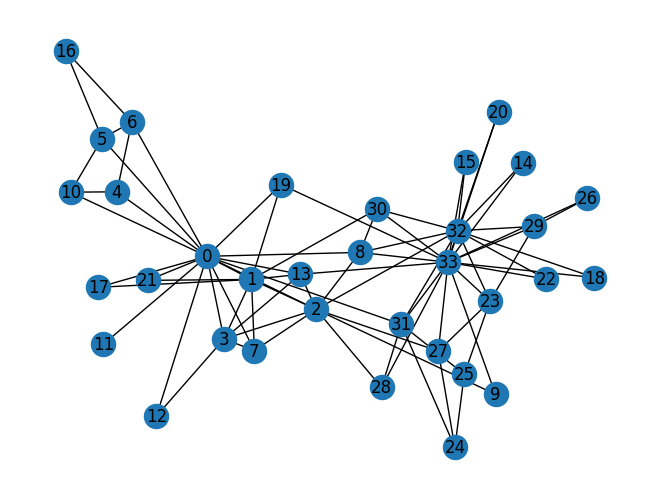

In [12]:
KG = nx.karate_club_graph() # 创建空手道俱乐部图
nx.draw(KG, with_labels=True)

# 5、图的性质

In [27]:
# 5.1 计算指定节点的邻接节点
neigbor = [n for n in g.neighbors(1)]
print(neigbor)

# 计算k-hop邻接节点
def get_neigbors(g, node, depth=1):
    output = {}
    layers = dict(nx.bfs_successors(g, source=node, depth_limit=depth))
    nodes = [node]
    for i in range(1,depth+1):
        output[i] = []
        for x in nodes:
            output[i].extend(layers.get(x,[]))
        nodes = output[i]
    return output[depth]

k_hop_neigbor = get_neigbors(g, 1, 2)
print("k-hop neigbors: ", k_hop_neigbor)

[2, 5, 3]
k-hop neigbors:  [4]


In [29]:
# 5.2 计算节点的度
print(g.degree(1)) # 节点1的度
print(g.degree()) # 所有节点的度

3
[(1, 3), (2, 2), (3, 4), (5, 2), (4, 1)]


In [31]:
# 5.3 计算平均度和度分布
# 计算平均度
def average_degree(num_edges, num_nodes):
    # this function takes number of edges and number of nodes
    # returns the average node degree of the graph. 
    # Round the result to nearest integer (for example, 3.3 will be rounded to 3 and 3.7 will be rounded to 4)
    avg_degree = 0
    #########################################
    avg_degree = 2*num_edges/num_nodes
    avg_degree = int(round(avg_degree))
    #########################################
    return avg_degree

num_edges = g.number_of_edges()
num_nodes = g.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of the given graph is {}".format(avg_degree))


print(nx.degree_histogram(g)) # 度分布

Average degree of karate club network is 2
[0, 1, 2, 1, 1]


In [32]:
# 5.4 聚类系数
def average_clustering_coefficient(G):
    # this function that takes a nx.Graph
    # and returns the average clustering coefficient. 
    # Round the result to 2 decimal places (for example 3.333 will be rounded to 3.33 and 3.7571 will be rounded to 3.76)
    avg_cluster_coef = 0
    #########################################
    ## Note: 
    ## 1: Please use the appropriate NetworkX clustering function
    avg_cluster_coef = nx.average_clustering(G)
    avg_cluster_coef = round(avg_cluster_coef, 2)
    #########################################
    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(g)
print("Average clustering coefficient of the given graph is {}".format(avg_cluster_coef))


Average clustering coefficient of the given graph is 0.6


In [34]:
# 5.5 接近中心度
def closeness_centrality(G, node=5):
    # the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.

    closeness = 0
    #########################################
    # Raw version following above equation
    # source: https://stackoverflow.com/questions/31764515/find-all-nodes-connected-to-n
    path_length_total = 0 
    for path in list(nx.single_source_shortest_path(G,node).values())[1:]:
        path_length_total += len(path)-1

    closeness = 1 / path_length_total
    closeness = round(closeness, 2)

    return closeness

node = 5
closeness = closeness_centrality(g, node=node)
print("The given graph has closeness centrality (raw) {:.2f}".format(closeness))

# Normalized version from NetworkX
# Notice that networkx closeness centrality returns the normalized 
# closeness directly, which is different from the raw (unnormalized) 
# one that we learned in the lecture.
closeness = nx.closeness_centrality(g, node)
print("The given graph has closeness centrality (normalzied) {:.2f}".format(closeness))


The given graph has closeness centrality (raw) 0.17
The given graph has closeness centrality (normalzied) 0.67


# 6、图的连接

In [47]:
# 6.1 邻接矩阵
# https://www.osgeo.cn/networkx/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html#google_vignette
A = np.array(nx.adjacency_matrix(g, nodelist=[1, 2, 3, 4, 5]).todense())
print(A)

[[0 1 1 0 1]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [1 0 1 0 0]]


/var/folders/sh/z5w6pvpx45z6jqtgsfnnwf8h0000gq/T/ipykernel_74477/2455817961.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(g, nodelist=[1, 2, 3, 4, 5]).todense())


In [44]:
g.nodes()

NodeView((1, 2, 3, 5, 4))

In [52]:
# 6.2 关联矩阵
# https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.incidence_matrix.html
B = np.array(nx.incidence_matrix(g, nodelist=[1, 2, 3, 4, 5], edgelist=[(1, 2), (2, 3), (3, 4), (3, 5), (5, 1), (1, 3)]).todense())
print(B)

[[1. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]]


/var/folders/sh/z5w6pvpx45z6jqtgsfnnwf8h0000gq/T/ipykernel_74477/2862177595.py:2: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = np.array(nx.incidence_matrix(g, nodelist=[1, 2, 3, 4, 5], edgelist=[(1, 2), (2, 3), (3, 4), (3, 5), (5, 1), (1, 3)]).todense())


In [51]:
g.edges()

EdgeView([(1, 2), (1, 5), (1, 3), (2, 3), (3, 4), (3, 5)])